In [3]:
import numpy as np 
import pandas as pd
import os
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
import json

In [1]:
def read_dataset(filename="./updated_dataset.json"):
    with open(filename, "r") as f:
        return json.load(f)

In [235]:
from sklearn.preprocessing import MultiLabelBinarizer

interests = {'Adventure': 0, 'Architecture': 1, 'Arts and music': 2, 'Books': 3, 'Business': 4, 'Design': 5, 'Drawing': 6, 'Entertainment': 7, 'Family and relationships': 8, 'Fitness and wellness': 9, 'Food and drink': 10, 'Home and garden': 11,
             'Nature': 12, 'News': 13, 'Online': 14, 'Outdoor recreation': 15, 'Painting': 16, 'Pets': 17, 'Photography': 18, 'Politics and social issues': 19, 'Sculpture': 20, 'Shopping and fashion': 21, 'Sports': 22, 'Technology': 23, 'Travel': 24, 'Vehicles': 25}
interests_arr =['Adventure', 'Architecture', 'Arts and music', 'Books', 'Business', 'Design', 'Drawing', 'Entertainment', 'Family and relationships', 'Fitness and wellness', 'Food and drink', 'Home and garden', 'Nature', 'News', 'Online', 'Outdoor recreation', 'Painting', 'Pets', 'Photography', 'Politics and social issues', 'Sculpture', 'Shopping and fashion', 'Sports', 'Technology', 'Travel', 'Vehicles']
interestdict = {k: [] for k, v in interests.items()}
dataset = read_dataset()
data = {
    "users": [],
    "posts": [],
    "interests": [],

}
data.update(interestdict)


for user, info in dataset.items():
    for post_id, post_info in info["posts"].items():
        data["users"].append(user)
        data["posts"].append(post_id)
        data["interests"].append(info["interests"])
        labels = info["interests"].split(",")
        refined_labels = []
        for label in labels:
            label = label.strip()
            refined_labels.append(label)
        for label in interests.keys():
            if label in refined_labels:
                data[label].append(1)
            else:
                data[label].append(0)


df = pd.DataFrame(data)
df.head()


,users,posts,interests,Adventure,Architecture,Arts and music,Books,Business,Design,Drawing,...,Painting,Pets,Photography,Politics and social issues,Sculpture,Shopping and fashion,Sports,Technology,Travel,Vehicles
0,benlowy,18352767946044198,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,benlowy,17916697805696086,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,benlowy,17994994354742550,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,benlowy,17866021283879141,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,benlowy,18027574675481351,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [6]:
import os
import shutil
import json
import random



# Set the paths to your user folders and JSON file
users_folder_path = "../images/images/"

# Set the desired split ratio for training and test data
train_ratio = 0.8
test_ratio = 0.2

# Create training and test directories
train_dir = "../images_restructured/train/"
test_dir = "../images_restructured/test/"

# Get the list of user folders
user_folders = os.listdir(users_folder_path)
# Shuffle the user folders randomly
random.shuffle(user_folders)

# Split the user folders into training and test sets
num_train_users = int(train_ratio * len(user_folders))
train_users = user_folders[:num_train_users]
test_users = user_folders[num_train_users:]

# Loop through the user folders and move them to the appropriate directories
for user_folder in user_folders:

    # Determine if this user folder should be in the training or test set
    if user_folder in train_users:
        dest_folder = os.path.join(train_dir, user_folder)
    else:
        dest_folder = os.path.join(test_dir, user_folder)

    # Create the destination folder if it doesn't exist
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    # Copy all images from the user folder to the destination folder
    user_folder_path = os.path.join(users_folder_path, user_folder)
    image_files = os.listdir(user_folder_path)
    for image_file in image_files:
        image_file_path = os.path.join(user_folder_path, image_file)
        if os.path.isfile(image_file_path):
            shutil.copy(image_file_path, os.path.join(dest_folder, image_file))

print("Data has been split into training and test sets successfully!")


Data has been split into training and test sets successfully!


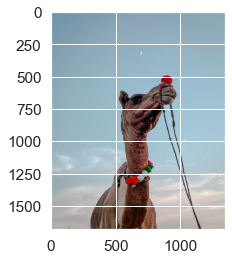

In [22]:
im = cv2.imread("../images_restructured/test/apple/17842329221767626.jpg")
# Display the image using pyplot
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
images = np.array([img],dtype='float32')

plt.imshow(images[0].astype(int))


In [44]:
IMAGE_SIZE= (150,150)

def get_label(user):    
    """
    Returns the interest of a defined user from a dataframe.

    Parameters:
        - df (pd.DataFrame): The dataframe containing user and interest columns
        - user (str): The user for which to retrieve the interest

    Returns:
        - interest (str): The interest of the defined user
    """

    # Filter the dataframe by user
    user_df = df[df['users'] == user]

    # Check if user exists in dataframe
    if user_df.empty:
        return "User not found."

    # Extract the interest for the defined user
    interest = user_df.iloc[0]
    interest.drop(['users', 'posts', 'interests'], inplace=True)
    result = []
    for e in interest :
        result.append(e)
    return result

def load_data():
    DIRECTORY = "../images_restructured/"
    CATEGORIES = ["train", "test"]
    
    i=0
    output = []
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        images = []
        labels = []
        print("Loading {} data...".format(category))
       
        for folder in os.listdir(path):
            label = get_label(folder)
            #iterate over each image in our folder
            for file in os.listdir(os.path.join(path,folder)):
                
                # get the image path
                img_path = os.path.join(path,folder,file)
                
                # read the image and convert to grayscale
                img= cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img= cv2.resize(img,IMAGE_SIZE)
                # append the image and its corresponding label to the output
                labels.append(label)
                images.append(img)
        images = np.array(images,dtype='float32')
        labels = np.array(labels)
        output.append((images,labels))
    
    return output
        
(train_images, train_labels), (test_images, test_labels) = load_data()


Loading train data...
Loading test data...


In [40]:
train_images,train_labels = shuffle(train_images,train_labels,random_state=0)

: 

IndexError: list index out of range

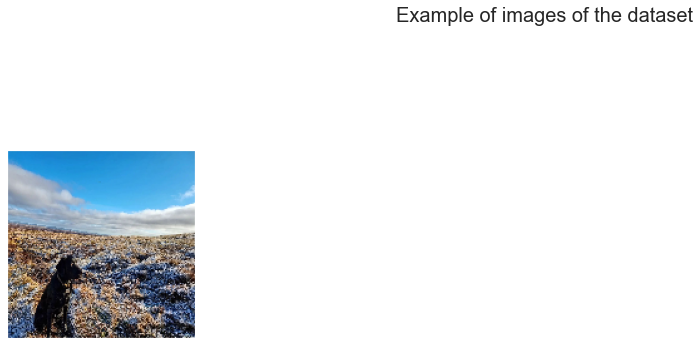

In [264]:
import random
def display_example(class_name, images, labels):
    
    figsize = (20, 20)
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Example of images of the dataset".format(
        class_name), fontsize=20)
    for i in range(10):
        k = random.randint(0, 40000)
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        # image = cv2.resize(images[i],figsize)
        img_float = images[k] / 255.0
        plt.imshow(images[k].astype(int))
        label = ""
        for j in range(len((labels[i]))):
            if labels[i][j] == 1:
                label += interests_arr[j]
        plt.xlabel(label,fontsize=10)
    plt.show()


display_example("train", train_images, train_labels)


# New model ( not pretrained )

In [184]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (9,9), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.sigmoid)
])

In [186]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [187]:
from sklearn.preprocessing import MultiLabelBinarizer

history = model.fit(train_images,train_labels, epochs=4, batch_size=32, validation_split=0.2)

Epoch 1/4
775/775 [==============================] - 340s 437ms/step - loss: 0.2585 - accuracy: 0.1291 - val_loss: 0.2979 - val_accuracy: 0.2556
Epoch 2/4
775/775 [==============================] - 343s 442ms/step - loss: 0.2329 - accuracy: 0.1638 - val_loss: 0.2588 - val_accuracy: 0.2659
Epoch 3/4
775/775 [==============================] - 328s 423ms/step - loss: 0.2238 - accuracy: 0.1945 - val_loss: 0.2210 - val_accuracy: 0.2548
Epoch 4/4
130/775 [====>.........................] - ETA: 4:19 - loss: 0.2171 - accuracy: 0.2079

KeyboardInterrupt: 

In [22]:
def plot_accuracy_loss(history):
    """
    Plot the accuracy and loss of the model
    """
    plt.figure(figsize=(10, 5))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],'bo--', label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("Training Accuracy")
    plt.xlabel("epoch")
    plt.legend(loc="lower right")

    plt.subplot(2,2,2)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("Training Loss")
    plt.xlabel("epoch")
    plt.legend(loc="upper right")
    plt.show()

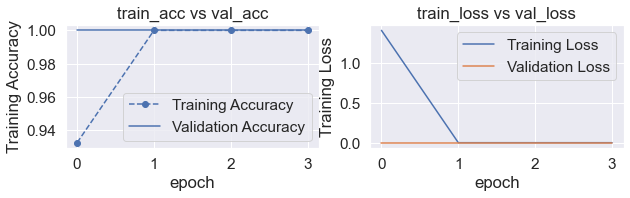

In [23]:
plot_accuracy_loss(history)

In [24]:
test_losss = model.evaluate(test_images, test_labels)

5/5 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [25]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred_labels))

5/5 [==============================] - 0s 51ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



# VGG16

In [242]:
# using VGG16
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import image 
from keras.applications.vgg16 import preprocess_input
from keras.models import Model


model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inpu, outputs=model.layers[-5].output)


In [137]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

247/247 [==============================] - 190s 768ms/step


In [244]:
import tensorflow as tf

# Load the pre-trained VGG16 model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained model's layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top for multi-label classification
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation="sigmoid")
    
    ])

# Compile the model
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4, batch_size=16, validation_split=0.2)

Epoch 1/4
   3/1550 [..............................] - ETA: 12:33 - loss: 4.9565 - accuracy: 0.0625   

KeyboardInterrupt: 

In [261]:



IMG_SIZE = 150 # Specify height and width of image to match the input format of the model
CHANNELS = 3 # Keep RGB color channels to match the input format of the model


import tensorflow_hub as hub

BATCH_SIZE = 256 # Big enough to measure an F1-score
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically
SHUFFLE_BUFFER_SIZE = 1024 # Shuffle the training data by a chunck of 1024 observations


feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))



In [262]:


feature_extractor_layer.trainable = False

model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1024, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(26, activation='sigmoid', name='output')
])

model.summary()



ValueError: Exception encountered when calling layer "keras_layer_3" (type KerasLayer).

in user code:

    File "c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_hub\keras_layer.py", line 242, in call  *
        result = smart_cond.smart_cond(training,

    ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (4 total):
        * <tf.Tensor 'inputs:0' shape=(None, 150, 150, 3) dtype=float32>
        * False
        * False
        * 0.99
      Keyword arguments: {}
    
     Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}


Call arguments received by layer "keras_layer_3" (type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 150, 150, 3), dtype=float32)
  • training=None

In [260]:
for batch in (train_images, train_labels):
    print(model.predict(batch)[:1])
    break



ValueError: in user code:

    File "c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_68" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 150, 150, 3)
